In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils_2 import plot_policy, plot_action_values, test_agent

Observation space shape: [5 5]
Number of actions: 4


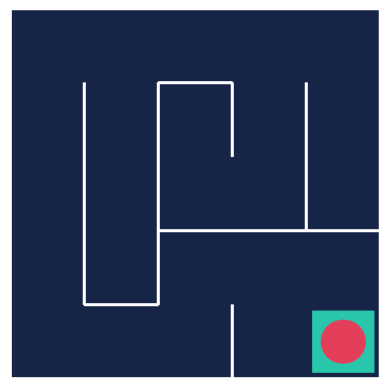

In [2]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

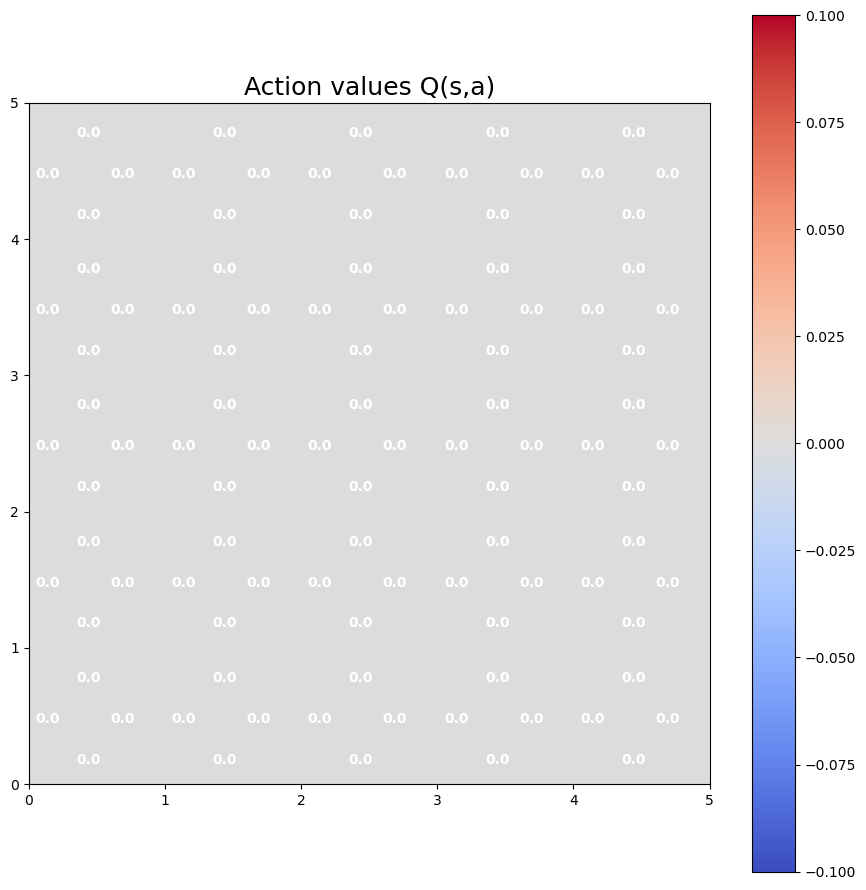

In [4]:
plot_action_values(action_values)

In [5]:
#state-: initial state
#epsilon-: random probability to choose an action
#av-: action value will be choosen if random_value < epsilion
#max value will be choosen at the end.

def policy(state, epsilon=0.0):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

In [6]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


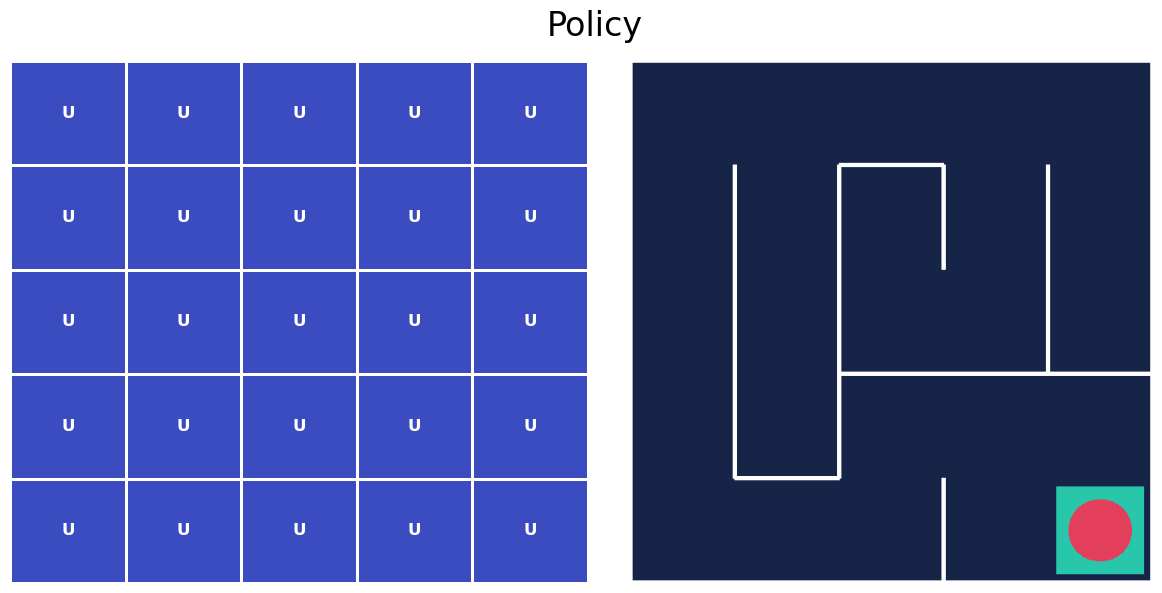

In [7]:
plot_policy(action_values, frame)

In [8]:
#policy-: the policy
#action_values-: the action value table will update value of every action
#episodes-: number of iterations in a env
#gamma-: discount factor
#epsilion-: will be the prob taken for choosing the random action to explore the env
#alpha-: measure the speed which will push the estimate in the direction of new returns
#for revery episode we will return the env
#done-: if the task is over or not.
#transitions-: every time the agent performs an action will save the state, action and the reward
#action-: random actions to explore
#itterate over all transitions but in reverse order
#G-: return at the last moment of time
#update the q value estimate by the alpha push to the direction of new returns

def constant_alpha_mc(policy, action_values, episodes, gamma=0.99, epsilon=0.2, alpha=0.1):
    
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])

In [13]:
constant_alpha_mc(policy, action_values, episodes=10000)

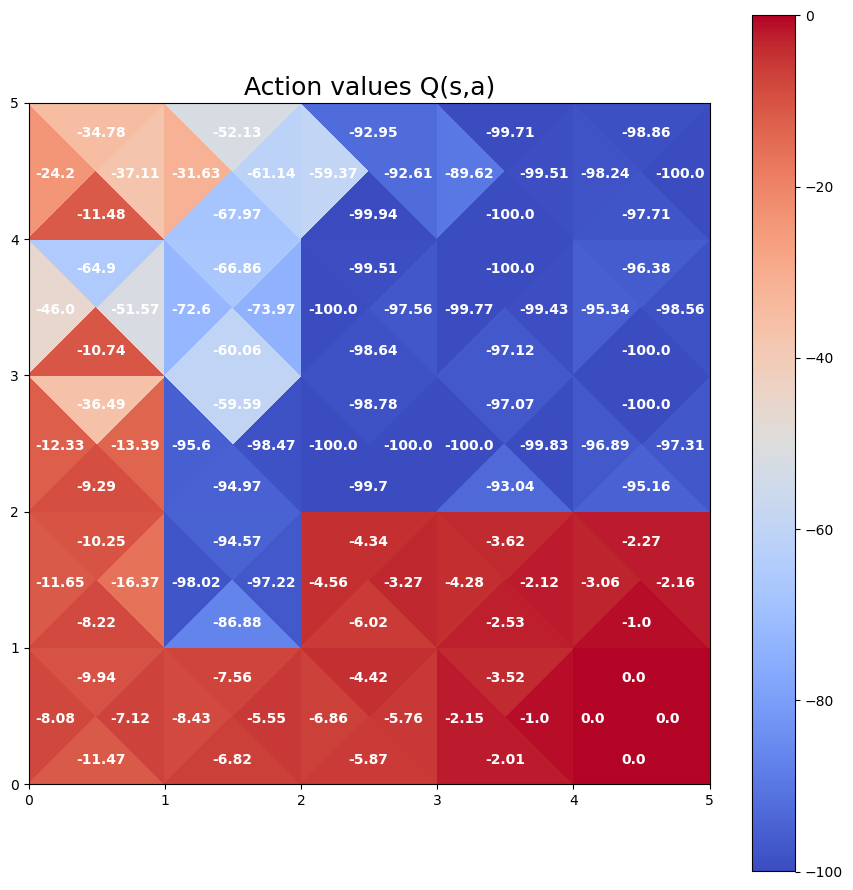

In [14]:
plot_action_values(action_values)

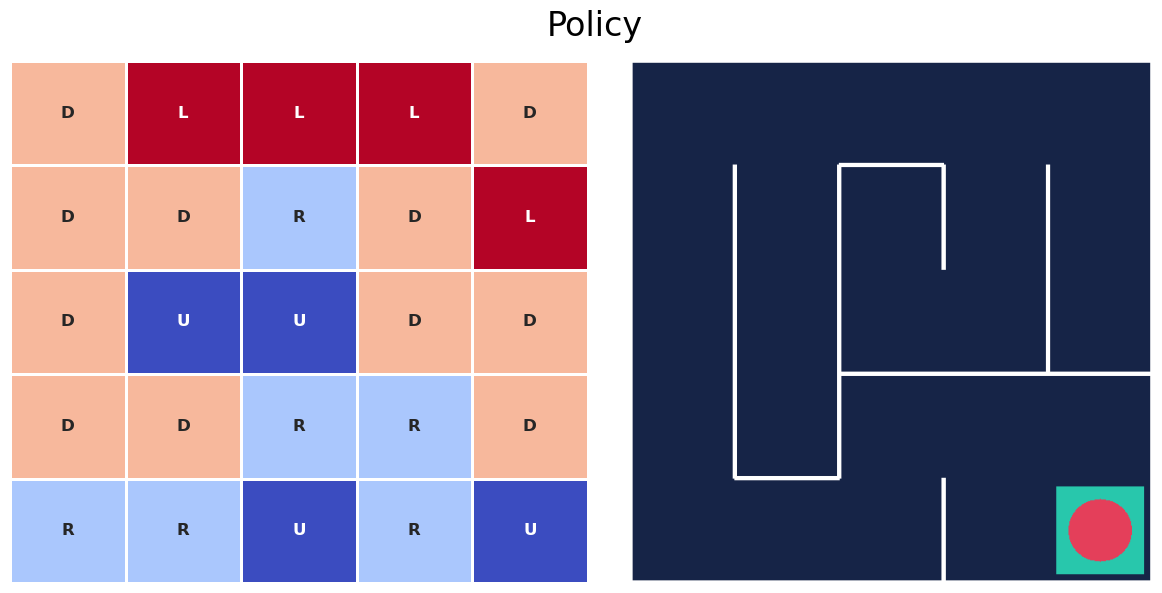

In [15]:
plot_policy(action_values, frame)

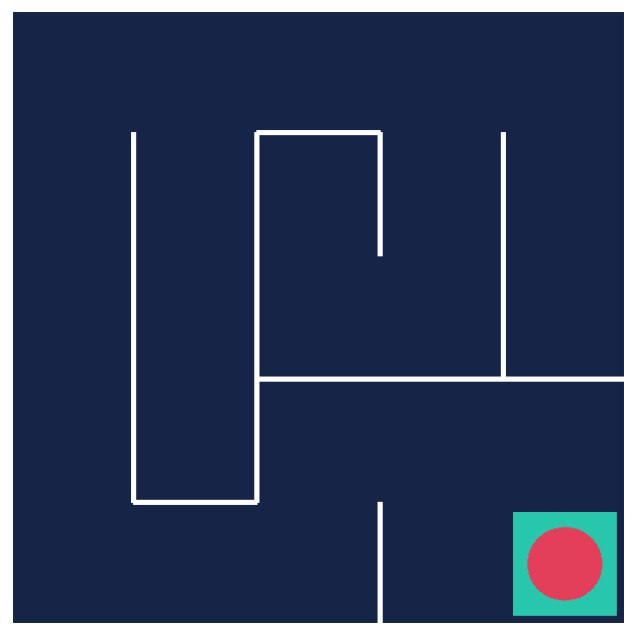

In [16]:
test_agent(env, policy)